In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
from math import pi
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance,intercluster_distance

### Le Clustering

In [2]:
df_data = data = pd.read_csv('df05.csv')
data 

,CustomerID,Recency,Frequency,Monetary,RFM_Score,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,2.38,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,2.37,1
2,0000f46a3911fa3c0805444483337064,541,1,86.22,1.83,1
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,2.02,3
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,2.06,4
...,...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,2067.42,3.94,5
93392,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,2.12,3
93393,ffff371b4d645b6ecea244b27531430a,572,1,112.46,1.82,5
93394,ffff5962728ec6157033ef9805bacc48,123,1,133.69,2.36,5


In [3]:
data.describe()

,Recency,Frequency,Monetary,RFM_Score,review_score
count,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000
mean,241.744250,1.237837,174.134824,2.500086,4.023063
std,153.164721,0.847540,263.116852,0.790067,1.395151
min,0.000000,1.000000,10.070000,1.810000,1.000000
25%,118.000000,1.000000,64.000000,2.030000,4.000000
50%,222.000000,1.000000,110.440000,2.250000,5.000000
75%,351.000000,1.000000,189.000000,2.470000,5.000000
max,728.000000,75.000000,13664.080000,4.990000,5.000000


In [4]:
data0 =df_data=data.sample(frac=0.15)
data0.shape

(14009, 6)

In [5]:
my_data = data0
X = my_data.drop(['CustomerID','RFM_Score','review_score'], axis = 1) 
X

,Recency,Frequency,Monetary
56937,19,1,42.89
79525,163,1,32.38
73559,397,1,374.15
91862,330,1,195.71
38677,152,1,68.87
...,...,...,...
23237,37,1,138.50
20924,442,1,117.94
29941,283,1,77.22
10959,198,1,215.14


### Normalisation des données

In [6]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler().fit(X)
ada_scaled = scale.transform(X)


In [7]:
df = pd.DataFrame(ada_scaled)
df.columns = ['Recency','Frequency','Monetary']

## Modelisation avec K-Means

#### L'algorithme de clustering K-means est un algorithme non supervisé utilisé pour segmenter un ensemble de données en clusters. Il peut être utilisé pour confirmer les hypothèses commerciales sur les types de groupes existants ou pour identifier des groupes inconnus dans des ensembles de données complexes.

In [8]:
from sklearn.cluster import KMeans

### Recherche de coefficent de silhouette 

In [9]:
silhou = []
for i in range (2, 12): 
 # initialisation de kmeans
    kmeans = KMeans(n_clusters=i,n_init='auto')
    kmeans.fit(ada_scaled)
    cluster_labels = kmeans.labels_
    silhou.append(silhouette_score(ada_scaled, cluster_labels))    

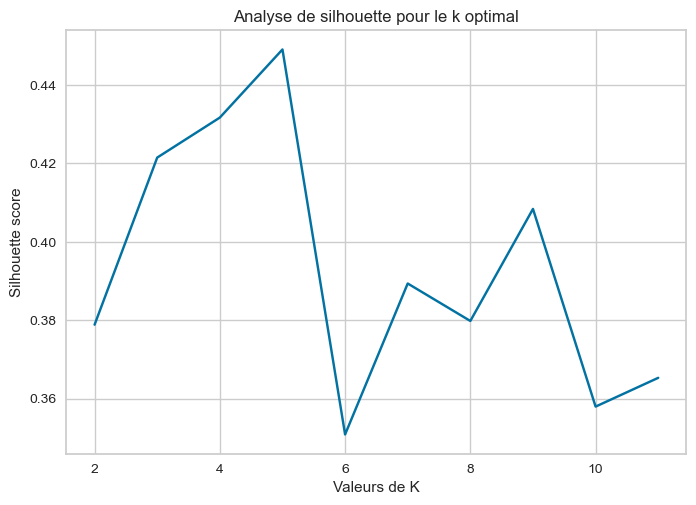

In [10]:
plt.plot(range(2, 12), silhou,'bx-')
plt.xlabel('Valeurs de K') 
plt.ylabel('Silhouette score') 
plt.title('Analyse de silhouette pour le k optimal')
plt.show()

Le K optimal a une valeur de 5

### La methode de coude ou distorsion 

In [11]:
inerti = []
for i in range (2, 12):
    mKmean = KMeans(n_clusters=i, random_state=42)
    mKmean.fit(ada_scaled)
    inerti.append(mKmean.inertia_)

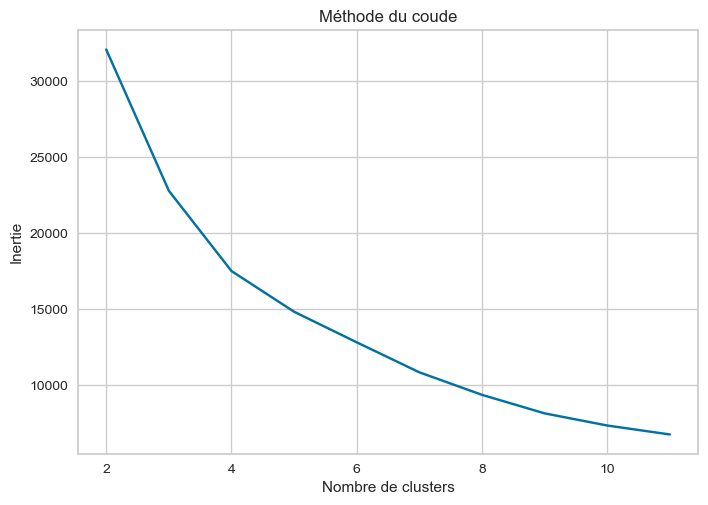

In [12]:
plt.plot(range(2, 12), inerti)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

### Graphique de distorsion avec  k = 5

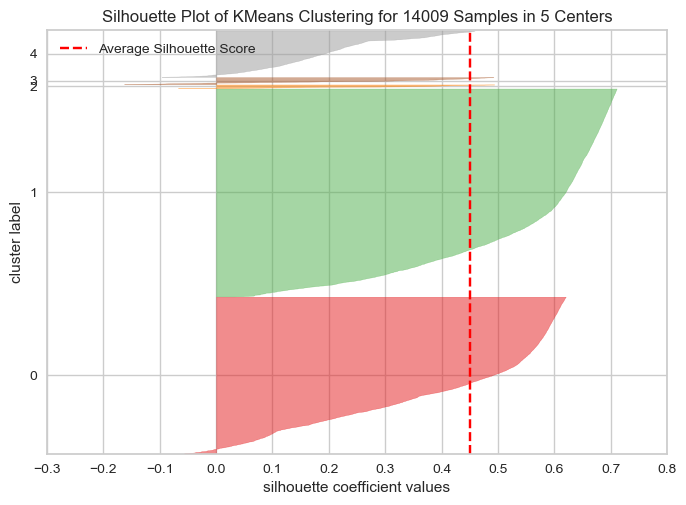

In [12]:
model = SilhouetteVisualizer(KMeans(5))
model.fit(ada_scaled)
model.show();

###  Graphique de distorsion avec  k = 4 

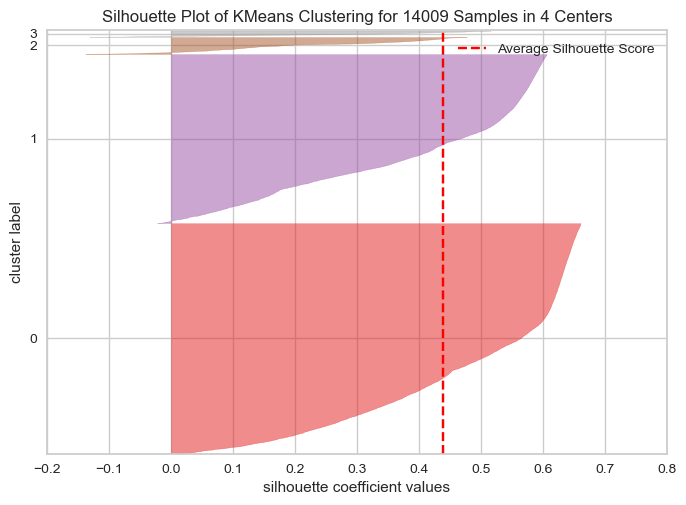

In [14]:
model = SilhouetteVisualizer(KMeans(4))
model.fit(ada_scaled)
model.show();

### modelisation de Kmeans avec k = 4

In [9]:
modelKmean = KMeans(n_clusters=4, init="k-means++", n_init='auto', random_state=42)
modelKmean.fit(ada_scaled)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [10]:
y_pred= modelKmean.labels_

In [11]:
print(f'Silhouette Score(n=4): {silhouette_score(ada_scaled, modelKmean.labels_)}')

Silhouette Score(n=4): 0.4477065509332014


On peut dire que les clusters ne sont pas éloignés les uns des autres car le score silhouette est plus proche de 0 (0.439) que de 1.
    Pour vérifier si notre score de silhouette fournit les bonnes informations ou non, créons un autre nuage de points montrant les points de données étiquetées.

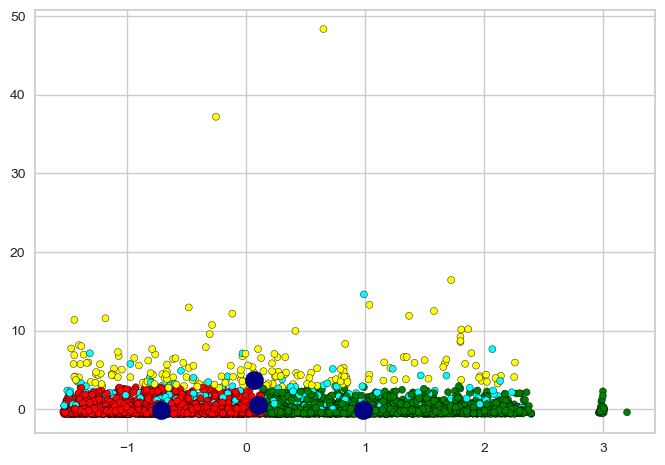

In [12]:
colorL = np.array(['#008000','cyan','#FF0000','#FFFF00'])
plt.scatter(ada_scaled[:,0], ada_scaled[:,2], s=25,edgecolor='black', c=colorL[modelKmean.labels_])
plt.scatter(modelKmean.cluster_centers_[:,0],modelKmean.cluster_centers_[:,1],s=175,c='#000080', label='centroids');

In [13]:
df_data['ClusterKmean'] = modelKmean.labels_
df_data

,CustomerID,Recency,Frequency,Monetary,RFM_Score,review_score,ClusterKmean
56937,9bcc66697a3c229fe7e4a27b5b219b75,19,1,42.89,2.54,4,2
79525,d9a3f1b87c490cd812f22b9ccf1844ef,163,1,32.38,2.29,5,2
73559,c942abf01919701c539ac21e33c371c3,397,1,374.15,1.95,5,0
91862,fbc40e36b37b736d84647a9f0473fe8b,330,1,195.71,2.02,5,0
38677,69abb26d2334dc4f4c622b76a5f4f3e9,152,1,68.87,2.31,5,2
...,...,...,...,...,...,...,...
23237,3f59da3cb710cc2853609980e1b820d3,37,1,138.50,2.50,5,2
20924,391e3f4aa9e5ba0bef1228510e0c0a49,442,1,117.94,1.91,5,0
29941,51d47430ee617368f08cdad480f58f1c,283,1,77.22,2.07,5,0
10959,1db34fb72dd70dfd8f9b34654a80d935,198,1,215.14,2.22,4,2


In [14]:
df_rad=df_data

In [15]:
NbrCli_Label = df_data.groupby('ClusterKmean')['Monetary'].count().reset_index()
NbrCli_Label.columns = ['ClusterKmean','Total']
NbrCli_Label

,ClusterKmean,Total
0,0,5675
1,1,341
2,2,7810
3,3,183


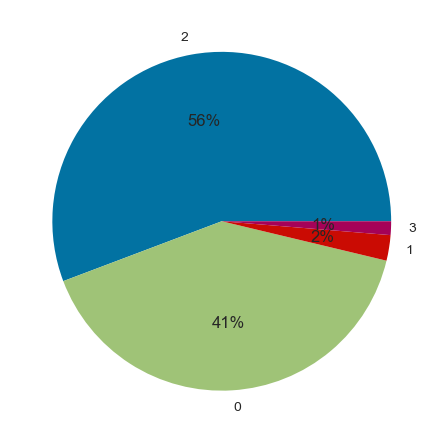

In [16]:
plt.pie(df_data.ClusterKmean.value_counts(),
        labels=df_data.ClusterKmean.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [17]:
df_data["TypeClient"] = np.where(df_data['ClusterKmean'] == 0, "Excellent Client",(np.where(df_data['ClusterKmean'] == 1,
                        "Bon Client",(np.where(df_data['ClusterKmean'] == 2,"Client Ordinaire","Client Moyen")))))
df_data[['CustomerID', 'ClusterKmean', 'TypeClient']].head(5)

,CustomerID,ClusterKmean,TypeClient
56937,9bcc66697a3c229fe7e4a27b5b219b75,2,Client Ordinaire
79525,d9a3f1b87c490cd812f22b9ccf1844ef,2,Client Ordinaire
73559,c942abf01919701c539ac21e33c371c3,0,Excellent Client
91862,fbc40e36b37b736d84647a9f0473fe8b,0,Excellent Client
38677,69abb26d2334dc4f4c622b76a5f4f3e9,2,Client Ordinaire


In [19]:
df_data

,CustomerID,Recency,Frequency,Monetary,RFM_Score,review_score,ClusterKmean,TypeClient
56937,9bcc66697a3c229fe7e4a27b5b219b75,19,1,42.89,2.54,4,2,Client Ordinaire
79525,d9a3f1b87c490cd812f22b9ccf1844ef,163,1,32.38,2.29,5,2,Client Ordinaire
73559,c942abf01919701c539ac21e33c371c3,397,1,374.15,1.95,5,0,Excellent Client
91862,fbc40e36b37b736d84647a9f0473fe8b,330,1,195.71,2.02,5,0,Excellent Client
38677,69abb26d2334dc4f4c622b76a5f4f3e9,152,1,68.87,2.31,5,2,Client Ordinaire
...,...,...,...,...,...,...,...,...
23237,3f59da3cb710cc2853609980e1b820d3,37,1,138.50,2.50,5,2,Client Ordinaire
20924,391e3f4aa9e5ba0bef1228510e0c0a49,442,1,117.94,1.91,5,0,Excellent Client
29941,51d47430ee617368f08cdad480f58f1c,283,1,77.22,2.07,5,0,Excellent Client
10959,1db34fb72dd70dfd8f9b34654a80d935,198,1,215.14,2.22,4,2,Client Ordinaire


In [20]:
df_op = df_data.drop(['CustomerID','TypeClient','review_score'],axis = 1)
df_op 

,Recency,Frequency,Monetary,RFM_Score,ClusterKmean
56937,19,1,42.89,2.54,2
79525,163,1,32.38,2.29,2
73559,397,1,374.15,1.95,0
91862,330,1,195.71,2.02,0
38677,152,1,68.87,2.31,2
...,...,...,...,...,...
23237,37,1,138.50,2.50,2
20924,442,1,117.94,1.91,0
29941,283,1,77.22,2.07,0
10959,198,1,215.14,2.22,2


### La distribution des données RFM

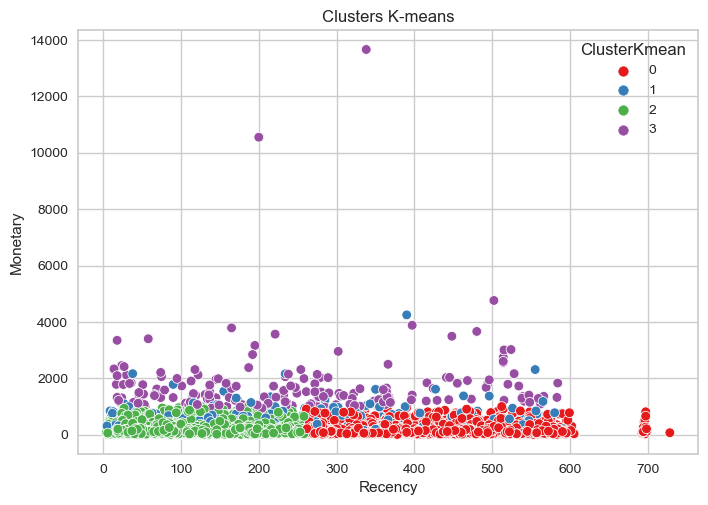

In [21]:
sns.scatterplot(data=df_data, x='Recency', y='Monetary', hue='ClusterKmean', palette='Set1')
plt.title("Clusters K-means")
plt.show()

### Analyse descriptive de la distribution des clusters par rapports au RFM

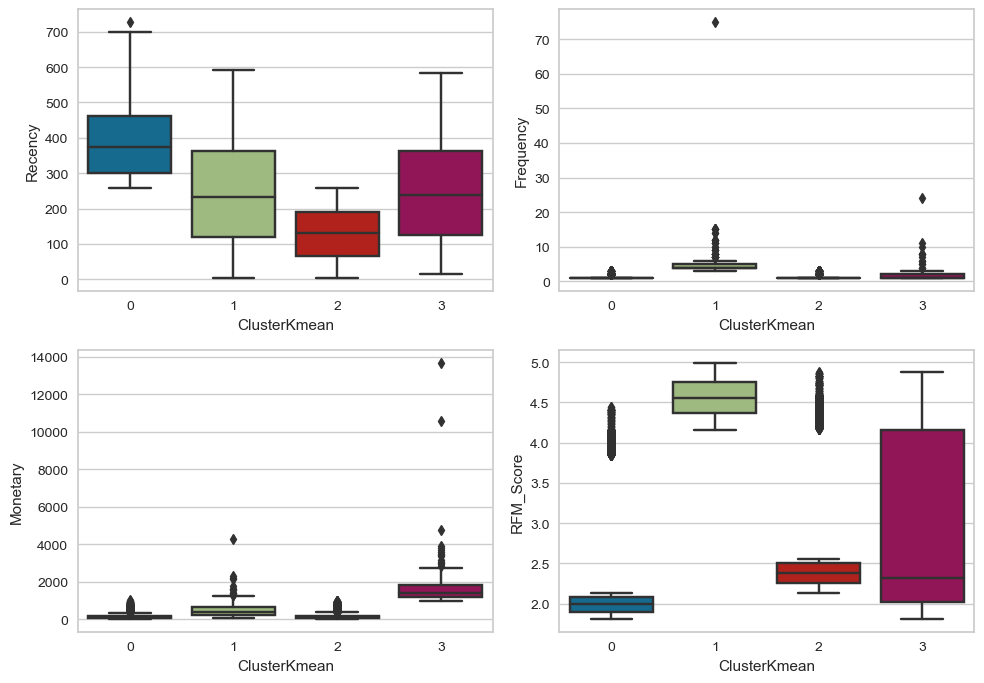

In [22]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(10,7))
row = 0
col = 0
for i in range(len(df_op.columns)-1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x =df_op['ClusterKmean'], y =df_op[df_op.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.show()

### Graphiques en 2 et 3D entre 3 features.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(ada_scaled)

PCA(n_components=3)

In [24]:
X_proj = pca.transform(ada_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3"])
X_proj[:5]

,PC1,PC2,PC3
0,-0.558373,-1.420635,0.165350
1,-0.553688,-0.477602,0.191323
2,0.362863,1.023984,-0.675909
3,-0.103678,0.600969,-0.223377
4,-0.463653,-0.552706,0.098896


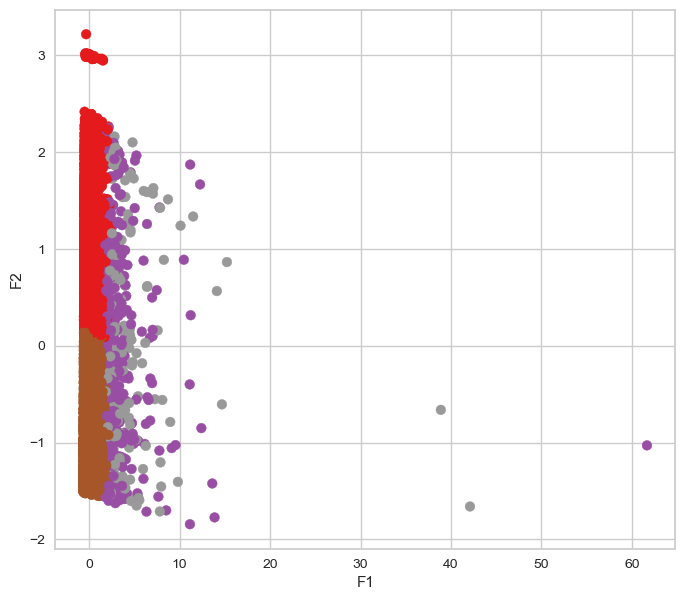

In [25]:
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= modelKmean.labels_, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

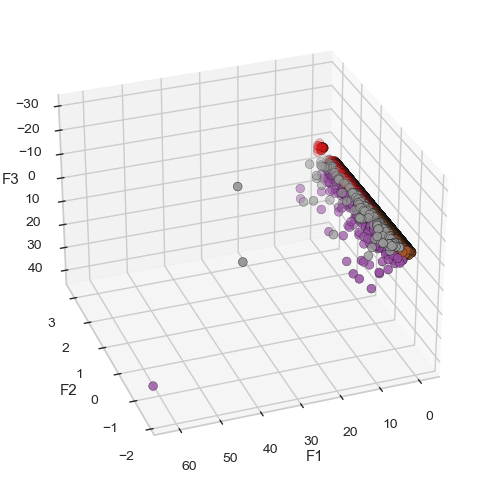

In [26]:
fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
# On affiche nos points : 
ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c= modelKmean.labels_, cmap="Set1", edgecolor="k", s=40) 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3");

## Le diagramme RADAR des clusters

In [27]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import normalize

In [28]:
df_rad_s = df_rad.drop(['CustomerID','ClusterKmean','TypeClient'], axis=1)
df_rad_s

,Recency,Frequency,Monetary,RFM_Score,review_score
56937,19,1,42.89,2.54,4
79525,163,1,32.38,2.29,5
73559,397,1,374.15,1.95,5
91862,330,1,195.71,2.02,5
38677,152,1,68.87,2.31,5
...,...,...,...,...,...
23237,37,1,138.50,2.50,5
20924,442,1,117.94,1.91,5
29941,283,1,77.22,2.07,5
10959,198,1,215.14,2.22,4


In [29]:
X = df_rad_s

In [30]:

from sklearn import preprocessing
scale_rad = preprocessing.StandardScaler().fit(X)
rad_scale = scale_rad.transform(X)

In [31]:
modelKmean = KMeans(n_clusters=4, init="k-means++", n_init='auto', random_state=42)
modelKmean.fit(rad_scale)
rad_labels = modelKmean.labels_

In [32]:
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled["rad_labels"] = rad_labels
X_scaled_clusters = X_scaled.groupby("rad_labels").mean()
X_scaled_clusters

,Recency,Frequency,Monetary,RFM_Score,review_score
rad_labels,,,,,
0,0.530142,0.000000,0.009717,0.050085,0.750949
1,0.328237,0.047297,0.146150,0.524824,0.738636
2,0.172157,0.000000,0.009398,0.168216,0.758182
3,0.326962,0.019850,0.017257,0.784483,0.754490


In [33]:
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()
    
    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))
    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Diagramme radar des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=25)

    fig.show()

In [35]:
plot_radars(data=X_scaled_clusters,
            group="rad_labels")

In [36]:
NbrCli_Label

,ClusterKmean,Total
0,0,5675
1,1,341
2,2,7810
3,3,183


## Modelisation avec DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

### Preparation des données avec review score

In [38]:
df_scan0 = pd.read_csv('df_m0.csv')

In [39]:
df_0 = df_scan0.sample(frac=0.3)
df_0.shape

(34683, 40)

In [40]:
df_0 = df_0[['review_score','payment_value']]
df_0

,review_score,payment_value
36405,5,101.25
86994,1,232.70
61519,5,85.83
10783,2,301.38
27587,5,52.38
...,...,...
79431,1,318.25
89870,1,147.50
23469,5,74.07
79495,3,29.69


In [41]:
scale_scan = preprocessing.StandardScaler().fit(df_0)
scaled_scan = scale_scan.transform(df_0)

In [42]:
dbscan = DBSCAN(eps=0.5, min_samples=100)
# Adapter le modèle aux données.
dbscan.fit(scaled_scan)
# Les étiquettes de cluster sont disponibles dans l'attribut 'labels_'.
cluster_labels1 = dbscan.labels_

In [43]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(scaled_scan, cluster_labels1):.3f}")

Silhouette Coefficient: 0.481


In [44]:
df_0['Cluster'] = cluster_labels1

### Nombre de cluster obtenu : 

In [45]:
nb_clus = df_0.groupby('Cluster').count()
nb_clus

,review_score,payment_value
Cluster,,
-1,564,564
0,19495,19495
1,4300,4300
2,1135,1135
3,6383,6383
4,2806,2806


Il y a 6 clusters

##  Modelisation avec Classification Ascendante Hiérarchique (CAH)

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples


In [43]:
ada_scaled

array([[-0.76471531, -0.23550209, -0.27843877],
       [-1.37547479, -0.23550209, -0.4829366 ],
       [-0.49182277, -0.23550209, -0.4356835 ],
       ...,
       [ 0.31385995, -0.23550209,  0.00532233],
       [-1.44694664, -0.23550209, -0.47749764],
       [-0.08248397, -0.23550209, -0.46561508]])

## Construction du dendogramme 
**Méthode du saut maximum** : Observez les distances verticales entre les fusions de clusters dans le dendrogramme. **Recherchez les sauts les plus importants** et identifiez le niveau de similarité/dissimilarité correspondant. Le nombre de clusters peut être déterminé par le nombre de sauts significatifs dans le dendrogramme.

In [44]:
#Ward : Cette méthode minimise la somme des carrés des écarts au sein des clusters.
link = linkage(ada_scaled, method="ward", metric='euclidean')

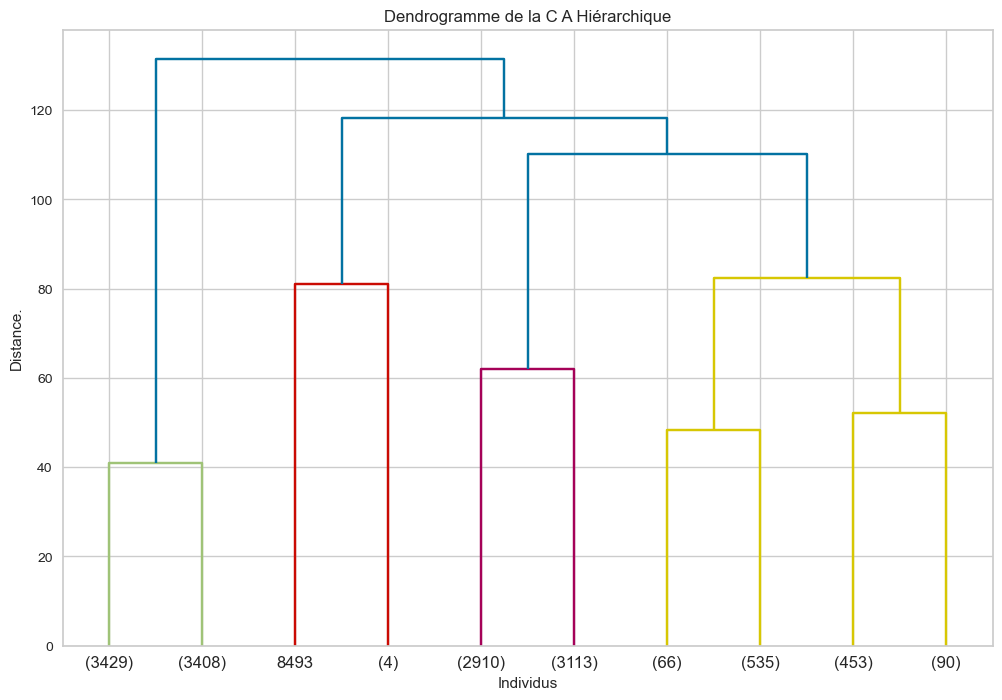

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(link, p=10, truncate_mode="lastp", ax=ax)

plt.title("Dendrogramme de la C A Hiérarchique")
plt.xlabel("Individus")
plt.ylabel("Distance.")
plt.show();

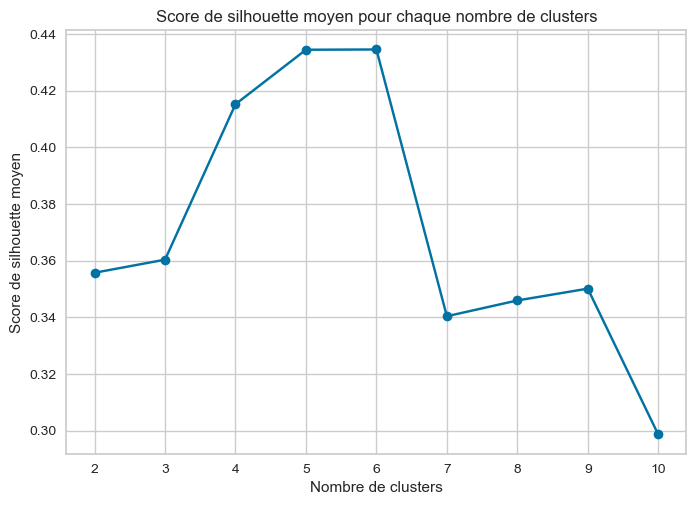

Nombre optimal de clusters : 6


In [46]:
# Effectuer la CAH avec différentes coupes du dendrogramme
max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage(ada_scaled, method='ward', metric='euclidean'), num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(ada_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

# Trouver le nombre optimal de clusters qui maximise le score de silhouette moyen
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car on commence à 2 clusters
print("Nombre optimal de clusters :", optimal_num_clusters)

In [44]:
num_clusters = 2
# Effectuer la CAH avec le nombre de clusters choisi
clusters = fcluster(link, num_clusters, criterion='maxclust')
# Ajouter les informations de cluster dans le DataFrame
df['Cluster'] = clusters

df

,Recency,Frequency,Monetary,Cluster
0,-0.463629,-0.299406,-0.046078,2
1,-0.306541,-0.299406,-0.418989,2
2,-1.288342,2.191364,0.352962,1
3,1.892694,-0.299406,0.149553,2
4,1.833786,-0.299406,-0.170225,2
...,...,...,...,...
10269,-0.149453,-0.299406,-0.109423,2
10270,-0.574900,-0.299406,-0.316939,2
10271,2.075964,-0.299406,-0.531142,2
10272,0.459264,2.191364,0.040126,1
